In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.21.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/mayabikmetova/anaconda3/lib/python3.6/site-packages
Requires: joblib, scipy, numpy
Required-by: pydqc, shap, scorecardpy, rasa-nlu, mlxtend, lime, lightgbm, imbalanced-learn, hdbscan, deeppavlov


### <font color='navy'> Рассмотрим поведедение техник ресемплинга на практике
    
        Создадим датасет с дисбалансом классов

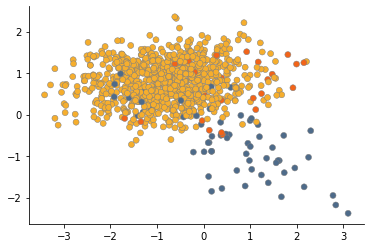

In [29]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.06, 0.02, 0.92],
                           class_sep=0.8, random_state=0)

colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y]
fig = plt.Figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='grey', linewidths=0.5)
sns.despine()

Попробуем применить самый наивный подход oversampling'а - случайное дублирование объектов минорного класса.

Text(0.5, 1.0, 'Random Oversampling')

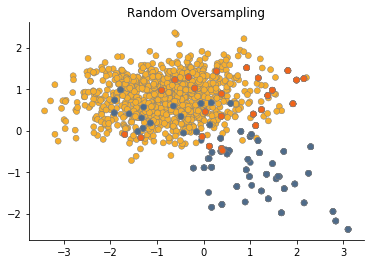

In [30]:
ros = RandomOverSampler(random_state=0, sampling_strategy={0: 300, 1: 300})
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Random Oversampling")

Перейдем к более сложному способу - генерации новых примеров на основе существуюших с помощью алгоритма SMOTE.

Text(0.5, 1.0, 'SMOTE')

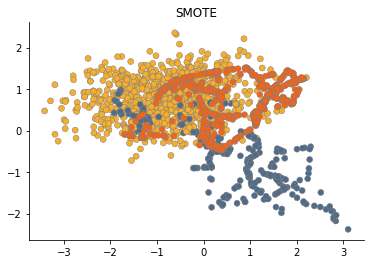

In [31]:
smote = SMOTE(random_state=0,  sampling_strategy={0: 300, 1: 500})
smote.fit(X, y)
X_resampled, y_resampled = smote.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("SMOTE")

На графике видно, что SMOTE создает много "шумных" объектов, которые находятся между выбросами и объектами точно относящимися к минорному классу. 

Для устранения проблемы можно воспользоваться одним из "очищающих" методов undersampling'а. Например, удалить те объекты чей класс отличен от класса _k_-ближайших соседей. 

Text(0.5, 1.0, 'SMOTEEEN')

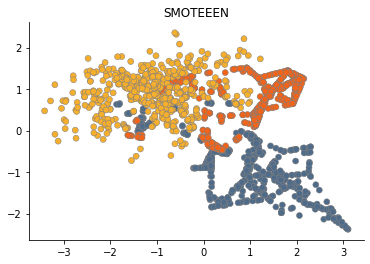

In [32]:
smote = SMOTEENN(random_state=0)
smote.fit(X, y)
X_resampled, y_resampled = smote.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("SMOTEEEN")

Рассмотрим также, как изменится датасет при выравнивании баланса классов с помощью удаления случайных объектов мажоритарного класса.

Text(0.5, 1.0, 'Random Undersampling')

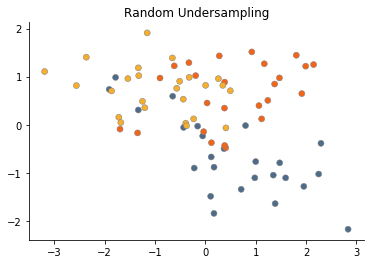

In [33]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Random Undersampling")

Удаление объектов мажоритарного класса, чье среднее расстояние до _k_-ближайших объектов редкого класса наименьшее.

Text(0.5, 1.0, 'Random Undersampling')

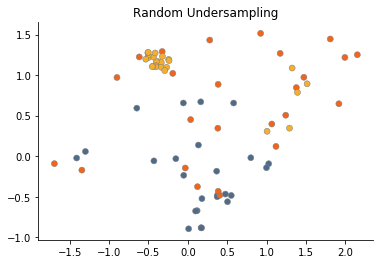

In [34]:
rus = NearMiss(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Random Undersampling")

## <font color='purple'> Загрузка данных

__Данные__: маркетинговая кампания по продаже банковских услуг

__Задача__: спрогнозировать, преобретет ли клиент услугу

Более подробная информация [здесь](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [4]:
bank = pd.read_csv("bank-full.csv", sep = ";", na_values = "unknown")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [6]:
bank.shape

(45211, 17)

In [7]:
# имеется ли у клиента задолженности по кредитам
bank["default"] = bank["default"].map({"no":0,"yes":1})

# наличие ипотеки
bank["housing"] = bank["housing"].map({"no":0,"yes":1})

# наличие др.займов
bank["loan"] = bank["loan"].map({"no":0,"yes":1})

# закодируем целевую переменную 
bank["y"] = bank["y"].map({"no":0,"yes":1})

# также закодируем уровень образования клиента
bank.education = bank.education.map({"primary": 0, "secondary":1, "tertiary":2})

# месяц последнего контакта с клиентом
bank.month = pd.to_datetime(bank.month, format = "%b").dt.month

In [8]:
# наличие пропусков
bank.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [9]:
# выбросим признаки "исход прошлой маркетинговой компании" и "тип коммуникации"
bank.drop(["poutcome", "contact"], axis = 1, inplace = True)
bank.dropna(inplace = True)

In [10]:
# закодируем категориальные признаки и избавимся от исходных столбцов
bank = pd.get_dummies(bank, drop_first = True)

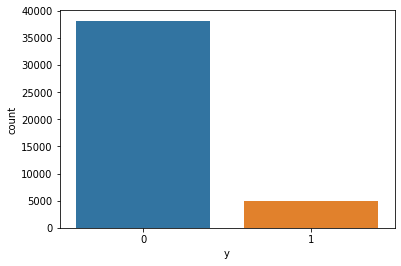

In [11]:
# посмотрим на распределение 
sns.countplot(x="y", data=bank)

In [12]:
bank.y.value_counts()

0    38172
1     5021
Name: y, dtype: int64

### Обучим бинарный классификатор на несбалансированных данных  

__NB__:При разделение выборки на трейн и тест необходимо использовать стратификацию, чтобы сохранить исходное распределение классов.

In [13]:
# отделим признаки от целевой переменной
X = bank.drop("y", axis = 1)
y = bank.y

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 1, stratify=y)

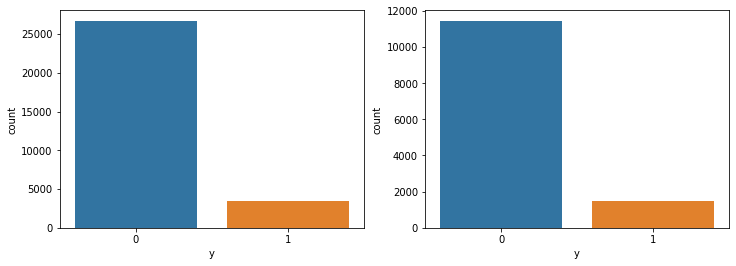

In [61]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x='y', data=pd.DataFrame(y_train), ax=axs[0])
sns.countplot(x='y', data=pd.DataFrame(y_test), ax=axs[1])

In [62]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[11220,   232],
       [ 1164,   342]])

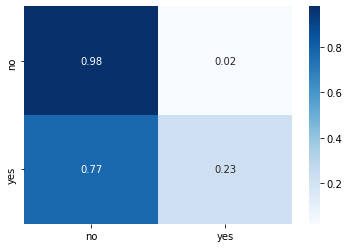

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_norm, index = [i for i in ['no', 'yes']],
                  columns = [i for i in ['no', 'yes']])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [65]:
print("Доля верных ответов (Accuracy): {0:.3f}".format(accuracy_score(y_test, y_pred)))
print("Полнота (Recall): {0:.3f}".format(recall_score(y_test, y_pred)))

Доля верных ответов (Accuracy): 0.892
Полнота (Recall): 0.227


# <font color='orange'> Алгоритм использования техник ресемплинга:

1. Разделяем выборку на обучающую и контрольную
2. Производим ресемплинг __только__ на обучающей выборке!
3. Оцениваем качество классификатора на неизмененной контрольной выборке.
    
Нарушение данного алгоритма может привести к неадекватной оценке на
контрольной выборке.

Например, при использовании oversampling и последующим разделении
данных, один и тот же объект может оказаться и в трейне, и в тесте.

<div>
<img src="resample.png" width="600"/>
</div>

## <font color='green'> Oversampling
    
### <font color='green'> Random Oversampling
    
    Дублирование существующих объектов редкого класса

In [56]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
np.bincount(y_train_ros)

array([26720, 26720])

In [57]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_ros, y_train_ros)

y_pred = lr.predict(X_test)

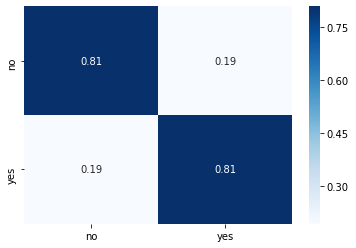

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_norm, index = [i for i in ['no', 'yes']],
                  columns = [i for i in ['no', 'yes']])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [59]:
print("Доля верных ответов (Accuracy) Random Oversampler: {0:.3f}".format(accuracy_score(y_test, y_pred)))
print("Полнота (Recall) Random Oversampler: {0:.3f}".format(recall_score(y_test, y_pred)))

Доля верных ответов (Accuracy) Random Oversampler: 0.807
Полнота (Recall) Random Oversampler: 0.805


### <font color='green'> SMOTE

    Генерация новых объектов минорного класса с помощью интерполяции.

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smt = SMOTE(random_state=1)

X_train_sm, y_train_sm = smt.fit_sample(X_train, y_train)
np.bincount(y_train_sm)

array([26720, 26720])

In [36]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_sm, y_train_sm)

y_pred = lr.predict(X_test)

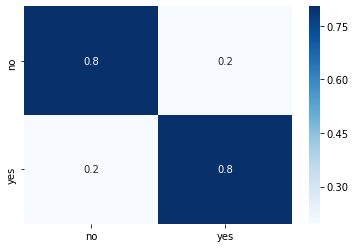

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_norm, index = [i for i in ['no', 'yes']],
                  columns = [i for i in ['no', 'yes']])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [38]:
print("Доля верных ответов (Accuracy) SMOTE: {0:.3f}".format(accuracy_score(y_test, y_pred)))
print("Полнота (Recall) SMOTE: {0:.3f}".format(recall_score(y_test, y_pred)))

Доля верных ответов (Accuracy) SMOTE: 0.804
Полнота (Recall) SMOTE: 0.804


## <font color='scarlett'>  Undersampling
    
### <font color='scarlett'> Random Undersampling
    
    Случайное удаление объектов мажоритарного класса.

In [39]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
np.bincount(y_train_rus)

array([3515, 3515])

In [41]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_rus, y_train_rus)

y_pred = lr.predict(X_test)

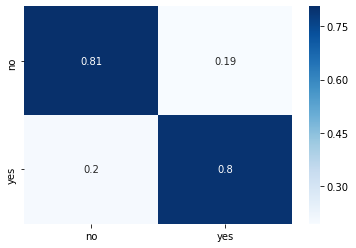

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_norm, index = [i for i in ['no', 'yes']],
                  columns = [i for i in ['no', 'yes']])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [43]:
print("Доля верных ответов (Accuracy) Random Undersampler: {0:.3f}".format(accuracy_score(y_test, y_pred)))
print("Полнота (Recall) Random Undersampler: {0:.3f}".format(recall_score(y_test, y_pred)))

Доля верных ответов (Accuracy) Random Undersampler: 0.805
Полнота (Recall) Random Undersampler: 0.797


### <font color='scarlett'> NearMiss-1

   Удаление объектов мажоритарного класса, чье среднее расстояние до _k_-ближайших объектов редкого класса наименьшее.

In [44]:
nm = NearMiss(version=1, random_state=1)
X_train_nm, y_train_nm = nm.fit_sample(X_train, y_train)
np.bincount(y_train_nm)

array([3515, 3515])

In [45]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_nm, y_train_nm)

y_pred = lr.predict(X_test)

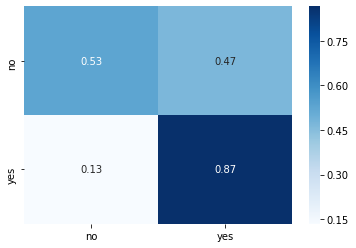

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_norm, index = [i for i in ['no', 'yes']],
                  columns = [i for i in ['no', 'yes']])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [47]:
print("Доля верных ответов (Accuracy) NearMiss: {0:.3f}".format(accuracy_score(y_test, y_pred)))
print("Полнота (Recall) NearMiss: {0:.3f}".format(recall_score(y_test, y_pred)))

Доля верных ответов (Accuracy) NearMiss: 0.570
Полнота (Recall) NearMiss: 0.866


## <font color='navy'> Комбинации oversampling и undersampling
    
    SMOTE with Tomek's links:
       1. Генерация новых точек с помощью SMOTE
       2. Удаление объектов, состоящих в связи Томека 

In [52]:
st = SMOTETomek(random_state=1)
X_train_st, y_train_st = st.fit_sample(X_train, y_train)
np.bincount(y_train_st)

array([26083, 26083])

In [53]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_st, y_train_st)

y_pred = lr.predict(X_test)

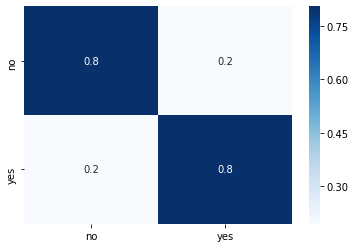

In [54]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_norm, index = [i for i in ['no', 'yes']],
                  columns = [i for i in ['no', 'yes']])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [55]:
print("Доля верных ответов (Accuracy) SMOTETomek: {0:.3f}".format(accuracy_score(y_test, y_pred)))
print("Полнота (Recall) SMOTETomek: {0:.3f}".format(recall_score(y_test, y_pred)))

Доля верных ответов (Accuracy) SMOTETomek: 0.804
Полнота (Recall) SMOTETomek: 0.805
